In [1]:
import os, random
import pathlib

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 41
random.seed(SEED)
np.random.seed(SEED)

%matplotlib inline

In [2]:
# my custom color palette
COLORS = ["#64E6FF", "#007DC5", "#4D2F9E", "#BE0046", "#EB5000", "#FFE600"]
sns.set_palette(sns.color_palette(COLORS))

In [3]:
flowers = {"rose":25, "lily":15, "sunflower":10, 
           "aster":32, "carnation":12, "jerbera":17} 

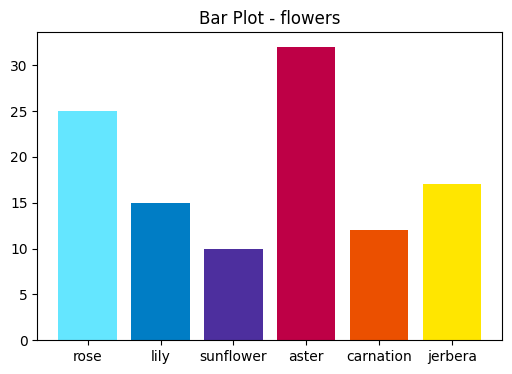

In [8]:
# bar plot of flowers
plt.figure(figsize=(6,4))
plt.bar(range(len(flowers)), list(flowers.values()), 
        tick_label=list(flowers.keys()), color=COLORS)
plt.title("Bar Plot - flowers")
plt.show()

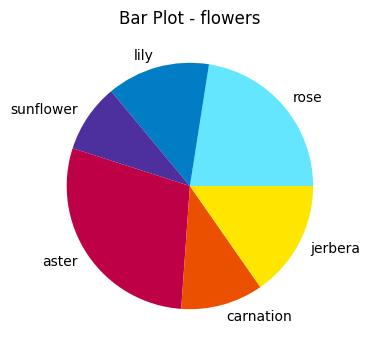

In [10]:
# pie chart of the same
plt.figure(figsize=(6, 4))
plt.pie(list(flowers.values()), labels=list(flowers.keys()), colors=COLORS)
plt.title("Bar Plot - flowers")
plt.show()


In [11]:
# let's create a random set of ages (discrete numeric variables)
ages = np.random.randint(10, 100, 200)

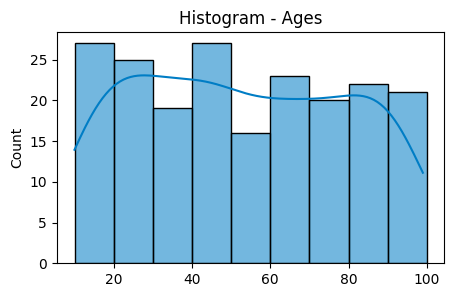

In [23]:
# create a histogram
plt.figure(figsize=(5,3))
sns.histplot(ages, color="#007DC5", alpha=0.55, binwidth=10, kde=True)
plt.title("Histogram - Ages")
plt.show()

In [25]:
SAMPLE_SIZE = 50
SAMPLE = np.random.randint(10, 100, SAMPLE_SIZE)
SAMPLE[:20]

array([18, 91, 45, 18, 76, 43, 44, 44, 40, 63, 81, 75, 15, 83, 94, 98, 95,
       36, 95, 69])

In [26]:
mean = np.mean(SAMPLE)   # using Numpy
# and this is how it's really calculated
mean1 = np.sum(SAMPLE) / SAMPLE_SIZE
print(f"Means: {mean:.3f} & {mean1:.3f}")

Means: 55.660 & 55.660


In [27]:
mean3 = (np.sum(SAMPLE) + 550) / (SAMPLE_SIZE + 1)
print(f"New mean: {mean3:.3f}") 

New mean: 65.353


In [5]:
DATA_FILE_PATH = pathlib.Path(os.getcwd()).parent / "data" / "kaggle" / "Salary_Data.csv"
assert os.path.exists(DATA_FILE_PATH), f"FATAL: {DATA_FILE_PATH} does not exist!"

In [6]:
# load data into a pandas dataframe
df = pd.read_csv(DATA_FILE_PATH)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\manis\AppData\Local\Temp\ipykernel_14156\1663465929.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




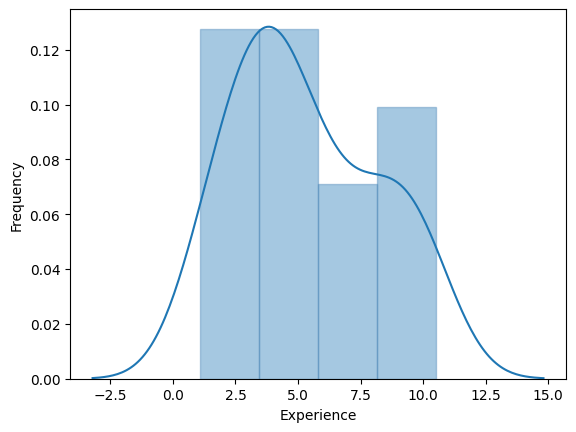

In [26]:
# plot histogram of years of experience
sns.distplot(df["YearsExperience"], hist_kws=dict(edgecolor="steelblue"))
plt.ylabel("Frequency")
plt.xlabel("Experience")
plt.show()

C:\Users\manis\AppData\Local\Temp\ipykernel_14156\7314334.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




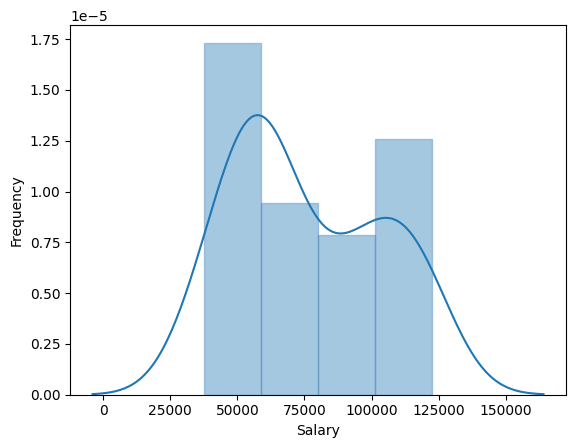

In [27]:
# plot histogram of salary
sns.distplot(df["Salary"], hist_kws=dict(edgecolor="steelblue"))
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

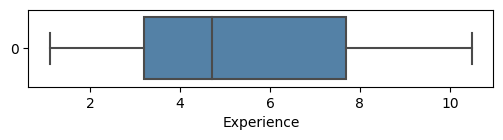

In [36]:
# detect outliers using boxplot
plt.figure(figsize=(6,1))
sns.boxplot(df["YearsExperience"], orient="h", color="steelblue")
plt.xlabel("Experience")
plt.show()

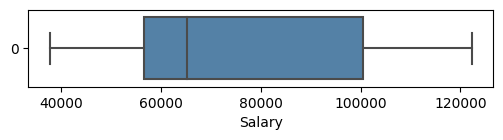

In [37]:
# detect outliers using boxplot
plt.figure(figsize=(6,1))
sns.boxplot(df["Salary"], orient="h", color="steelblue")
plt.xlabel("Salary")
plt.show()

In [39]:
df.loc[df.Salary > 120000]

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


In [46]:
# Old Salary = 122391.0
df.loc[df.YearsExperience == 10.3, "Salary"] = 500000

In [47]:

df.loc[df.Salary > 120000]


,YearsExperience,Salary
28,10.3,500000.0
29,10.5,121872.0


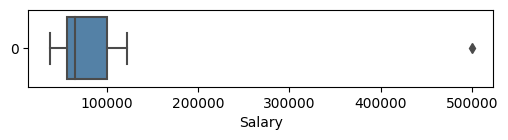

In [48]:
# detect outliers using boxplot
plt.figure(figsize=(6, 1))
sns.boxplot(df["Salary"], orient="h", color="steelblue")
plt.xlabel("Salary")
plt.show()


In [49]:
# restore old salary
df.loc[df.YearsExperience == 10.3, "Salary"] = 122391.0

In [50]:
df.loc[df.Salary > 120000]

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


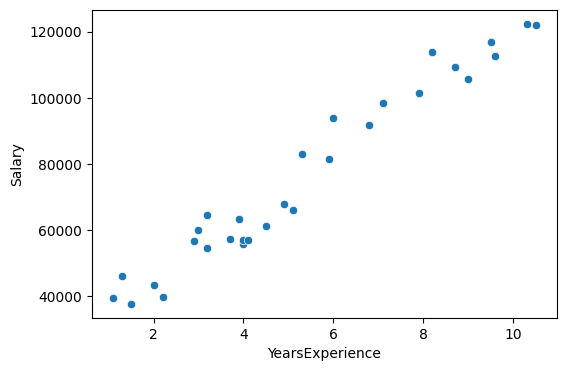

In [54]:
# scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(df, x="YearsExperience", y="Salary");

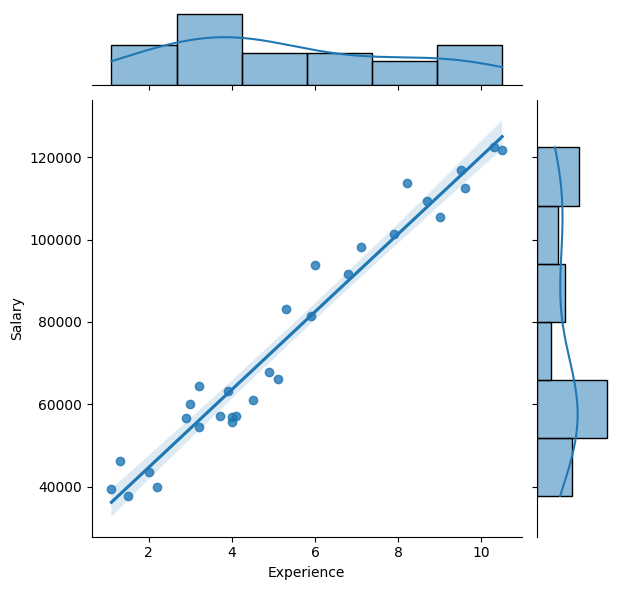

In [55]:
sns.jointplot(x="YearsExperience", y="Salary", data=df, kind="reg")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()
